In [3]:
import pandas as pd

In [4]:
teams = pd.read_csv("teams.csv")

In [5]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [7]:
data = pd.read_csv('athlete_events.csv')

In [8]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [10]:
data['Season'].value_counts()

Summer    222552
Winter     48564
Name: Season, dtype: int64

In [11]:
data['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [12]:
data['Event'].value_counts()

Football Men's Football                                5733
Ice Hockey Men's Ice Hockey                            4762
Hockey Men's Hockey                                    3958
Water Polo Men's Water Polo                            3358
Basketball Men's Basketball                            3280
                                                       ... 
Croquet Mixed Doubles                                     2
Archery Men's Target Archery, 50 metres, Individual       2
Archery Men's Target Archery, 33 metres, Individual       2
Archery Men's Target Archery, 28 metres, Individual       2
Aeronautics Mixed Aeronautics                             1
Name: Event, Length: 765, dtype: int64

In [13]:
data['Team'].value_counts()

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: Team, Length: 1184, dtype: int64

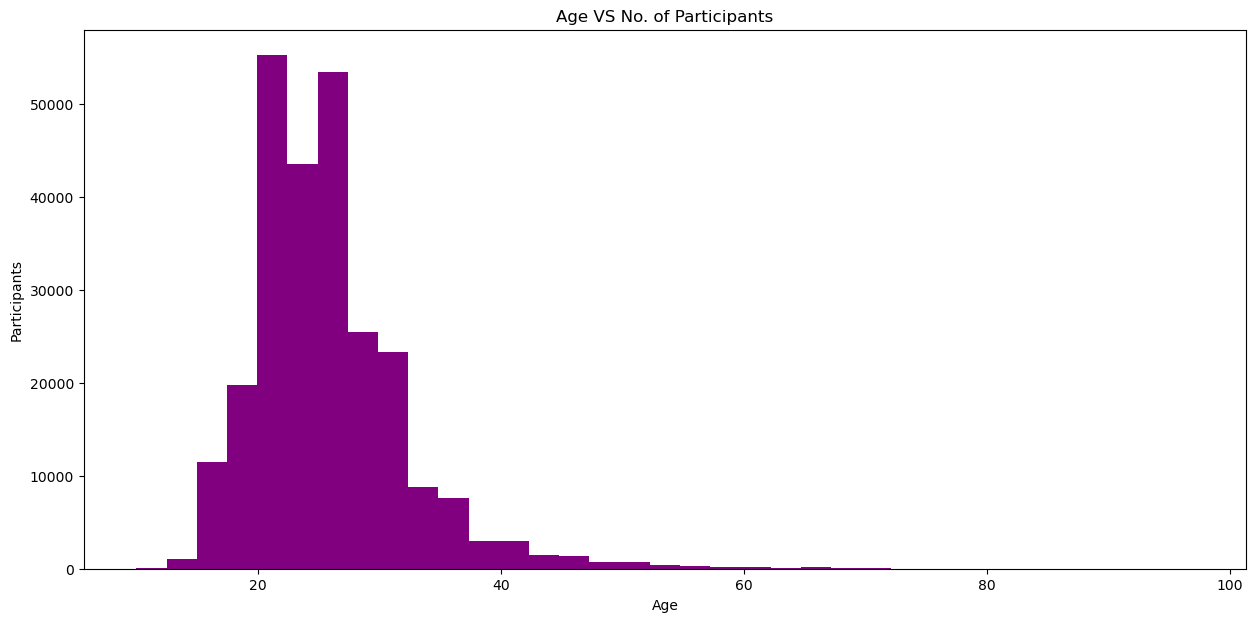

In [14]:
plt.figure(figsize=(15,7))
plt.title("Age VS No. of Participants")
plt.hist(data.Age,color='purple', bins = 35)
plt.xlabel("Age")
plt.ylabel("Participants")
plt.show()

In [15]:
age_dist = data.Age.value_counts().sort_values(ascending=False).head(15)
age_dist

23.0    21875
24.0    21720
22.0    20814
25.0    19707
21.0    19164
26.0    17675
27.0    16025
20.0    15258
28.0    14043
19.0    11643
29.0    11463
30.0     9488
18.0     8152
31.0     7559
32.0     6246
Name: Age, dtype: int64

In [16]:
gender_unique_values = data.Sex.value_counts()
gender_unique_values

M    196594
F     74522
Name: Sex, dtype: int64

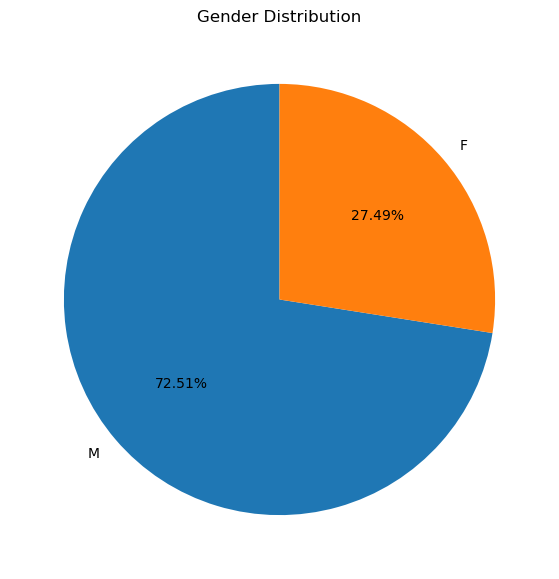

In [17]:
plt.figure(figsize=(15,7))
plt.title("Gender Distribution")
plt.pie(gender_unique_values, labels=gender_unique_values.index, autopct="%.2f%%", startangle=90)
plt.show()

In [18]:
female_part = data[(data.Sex=='F') & (data.Season == 'Summer')][['Sex', 'Year']]
female_part = female_part.groupby('Year').count().reset_index()
female_part

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


Text(0, 0.5, 'Female Participants')

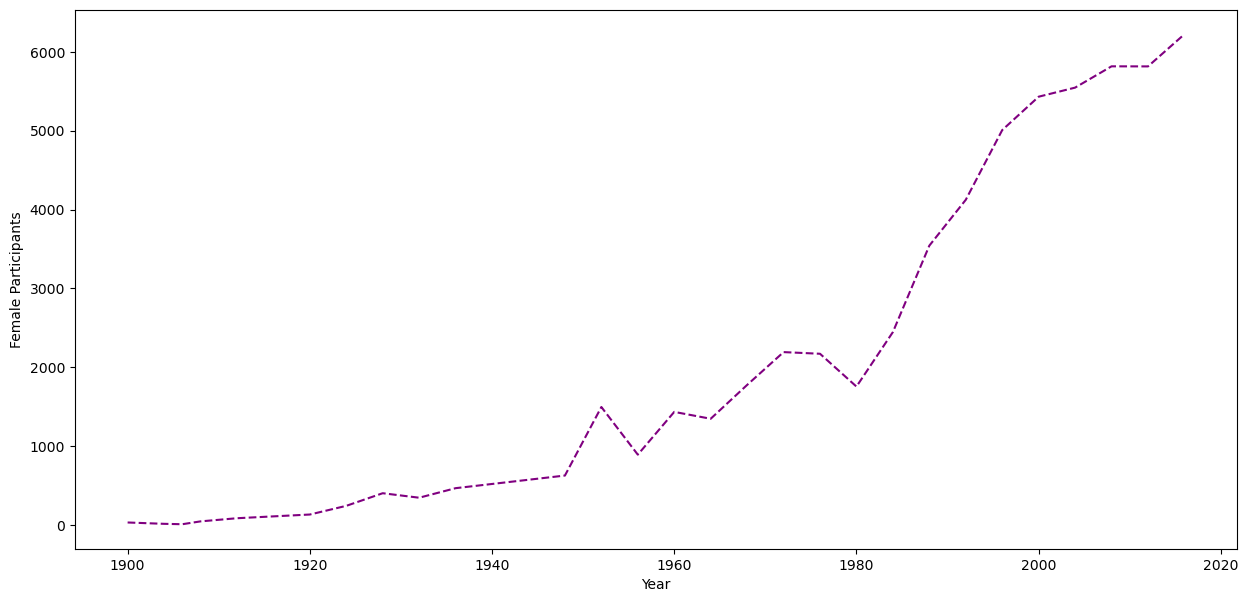

In [19]:
plt.figure(figsize=(15,7))
sns.lineplot(data=female_part, x='Year', y='Sex', linestyle = '--', color = 'purple')
plt.xlabel('Year')
plt.ylabel('Female Participants')

In [20]:
seasons = data.Season.value_counts()
seasons

Summer    222552
Winter     48564
Name: Season, dtype: int64

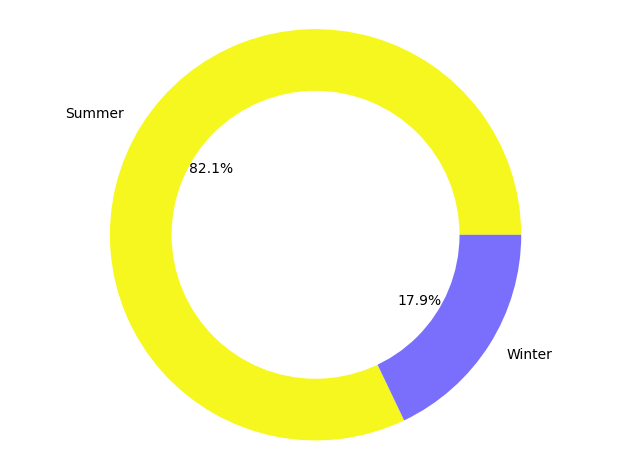

In [21]:
fig1, ax1 = plt.subplots()

colors = ['#f7f720','#796ffc']

ax1.pie(seasons, colors = colors, labels=seasons.index, autopct='%1.1f%%')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [22]:
top_countries = data.Team.value_counts().sort_values(ascending=False).head(15)
top_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Poland            6143
Switzerland       5844
Netherlands       5718
Soviet Union      5535
Finland           5379
Name: Team, dtype: int64

<AxesSubplot:title={'center':'Top 15 Countries Total Participations'}, ylabel='Team'>

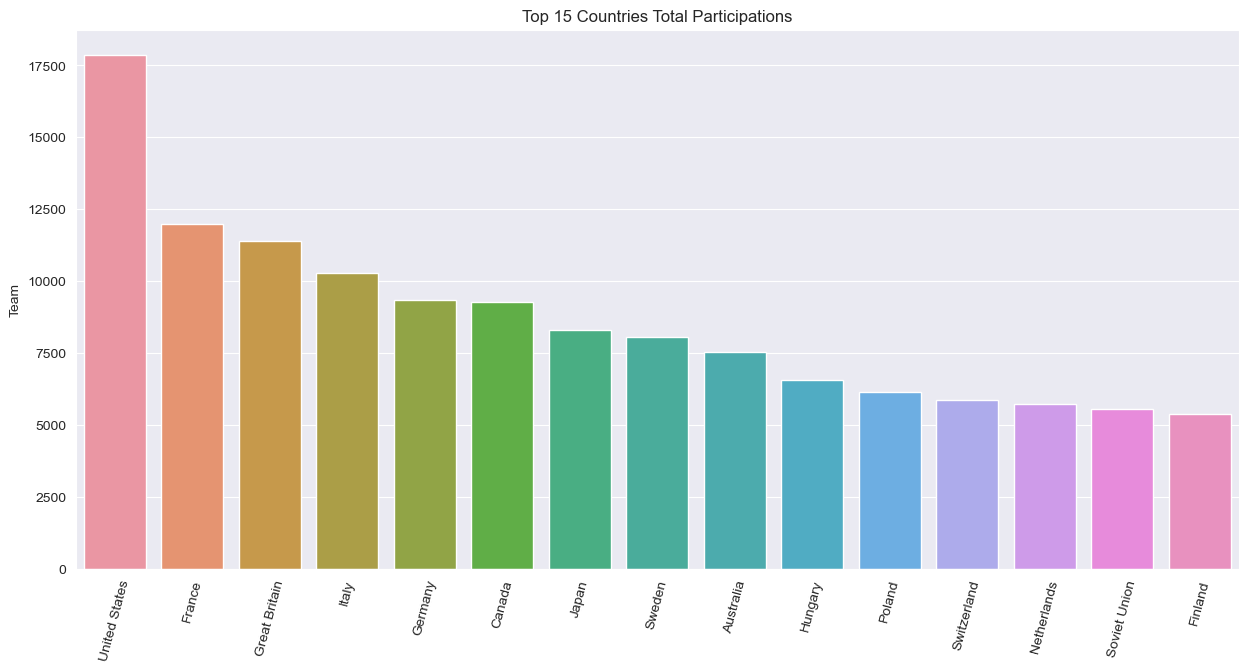

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 7))
plt.title('Top 15 Countries Total Participations')
plt.xticks(rotation=75)
sns.barplot(x=top_countries.index, y=top_countries)

In [24]:
max_year_country = data[(data.Medal == 'Gold')].Team
max_year_country = max_year_country.value_counts().head(20)
max_year_country

United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Hungary           432
Canada            422
East Germany      369
Russia            366
Australia         342
China             308
Norway            299
Netherlands       277
Japan             247
South Korea       211
Finland           198
Denmark           168
Cuba              164
Name: Team, dtype: int64

In [25]:
max_year_country = data[(data.Medal == 'Gold')].Team
max_year_country = max_year_country.value_counts().head(20)
max_year_country

United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Hungary           432
Canada            422
East Germany      369
Russia            366
Australia         342
China             308
Norway            299
Netherlands       277
Japan             247
South Korea       211
Finland           198
Denmark           168
Cuba              164
Name: Team, dtype: int64

Text(0.5, 0, 'Top 20 Gold Medal Won Countrywise')

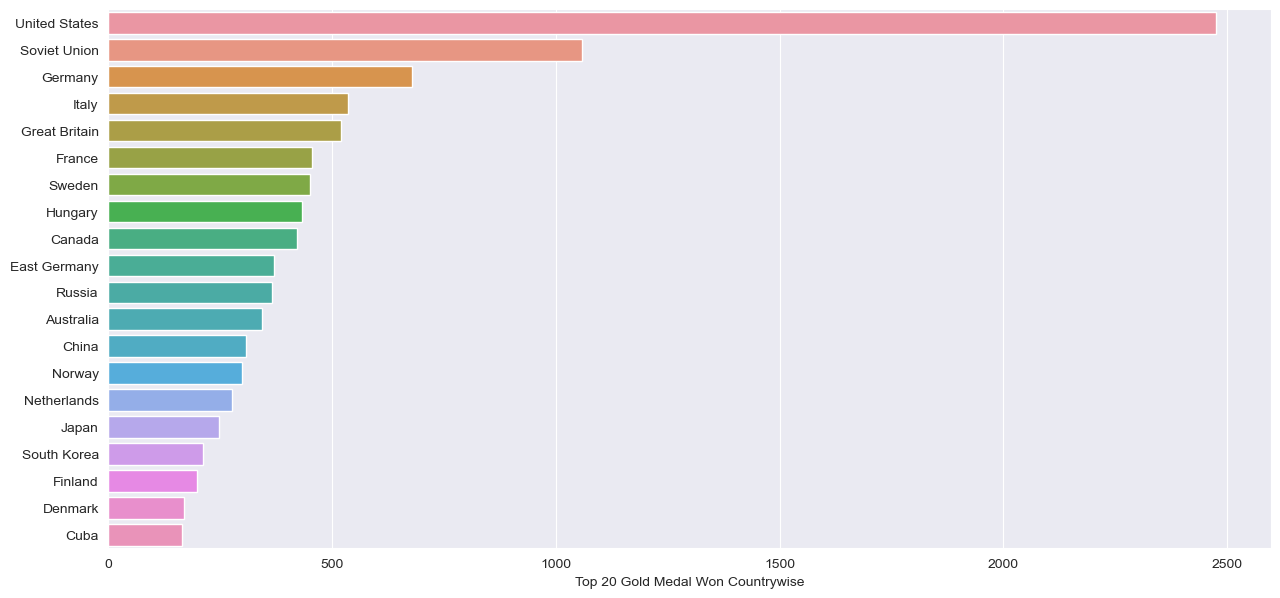

In [26]:
plt.figure(figsize=(15,7))
sns.barplot(x=max_year_country, y=max_year_country.index)
plt.xlabel("Top 20 Gold Medal Won Countrywise")

Text(0, 0.5, 'Height')

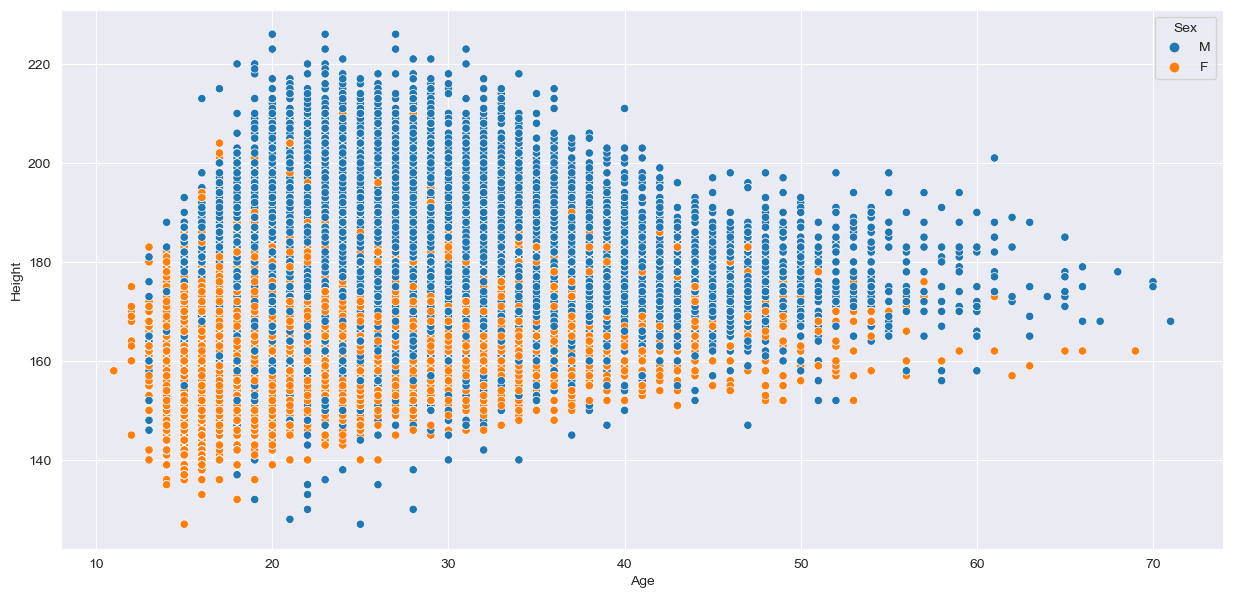

In [27]:
age_heig = data[(data.Age != 0) & (data.Height != 0.0) & (data.Medal != 'None') & (data.Season == 'Summer')]
plt.figure(figsize=(15,7))
sns.scatterplot(x=age_heig.Age, y=age_heig.Height, data=age_heig, hue='Sex')
plt.xlabel('Age')
plt.ylabel('Height')

Text(0, 0.5, 'Weight')

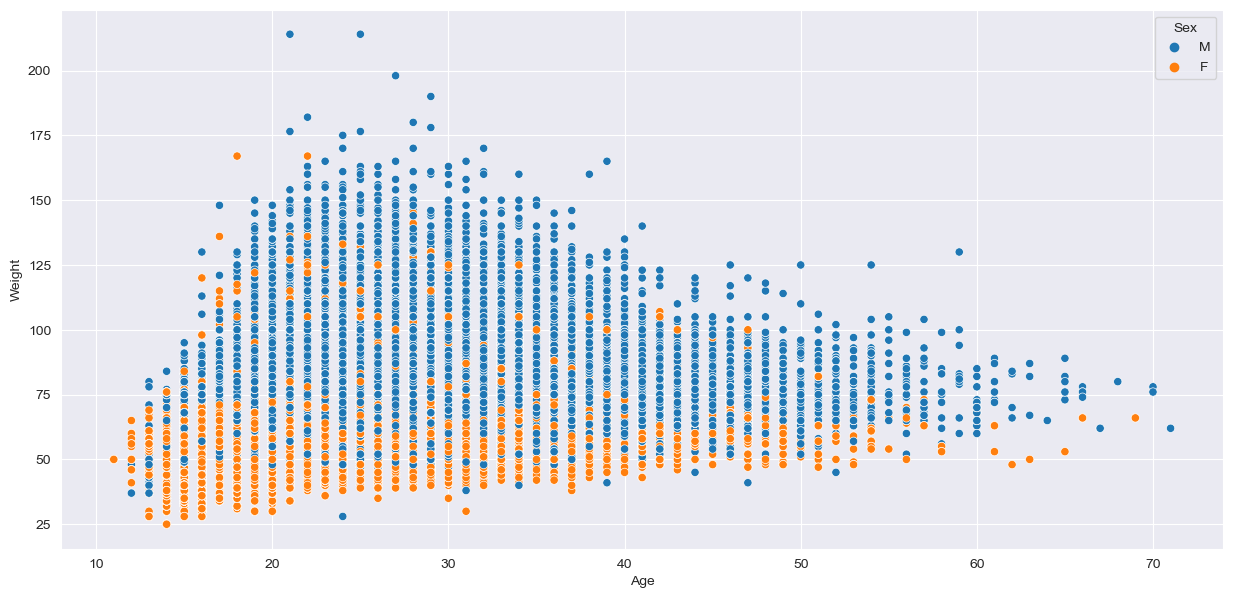

In [28]:
age_weig = data[(data.Age != 0.0) & (data.Weight != 0.0) & (data.Medal != 'None') & (data.Season == 'Summer')]
plt.figure(figsize=(15,7))
sns.scatterplot(x=age_weig.Age, y=age_weig.Weight, data=age_weig, hue='Sex')
plt.xlabel('Age')
plt.ylabel('Weight')

Text(0, 0.5, 'Height')

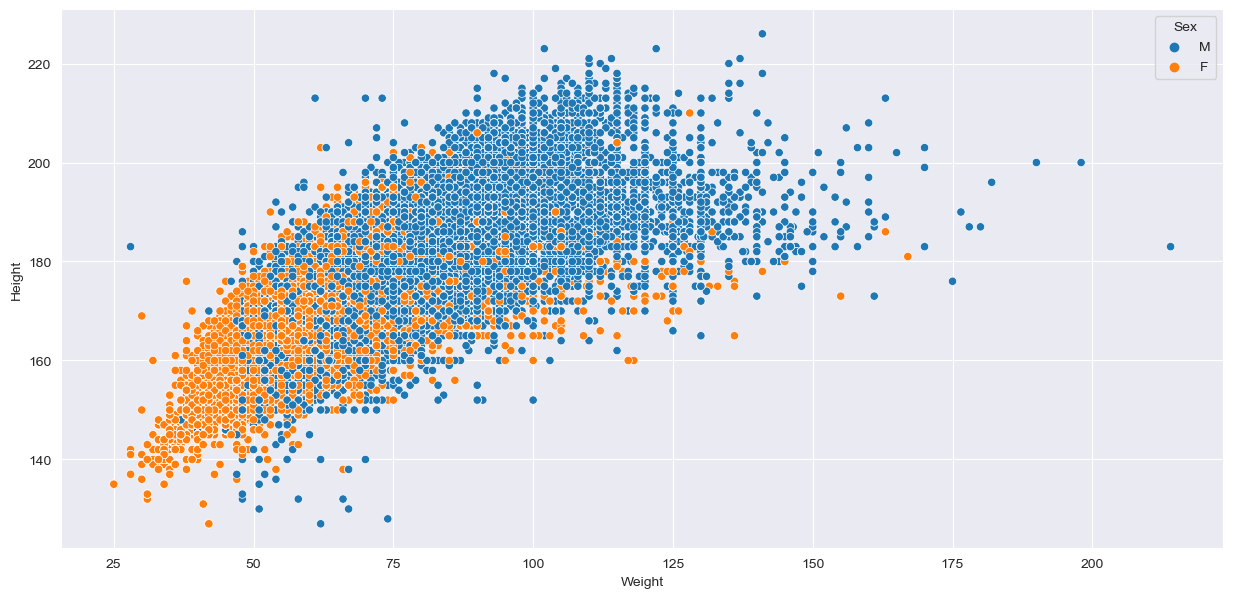

In [29]:
heig_weight = data[(data.Height != 0.0) & (data.Age != 0) & (data.Weight != 0.0) & (data.Medal != 'None') & (data.Season == 'Summer')]
plt.figure(figsize=(15,7))
sns.scatterplot(x=heig_weight.Weight, y=heig_weight.Height, data=heig_weight, hue='Sex')
plt.xlabel('Weight')
plt.ylabel('Height')

In [30]:
data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)

In [31]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [32]:
limited_data = data.head(10)

In [33]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [34]:
data = data.drop(['ID', 'Name', 'Games'], axis=1)

In [35]:
data.isna().mean()

Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.000000
dtype: float64

In [36]:
data.groupby(['Medal', 'Sex']).mean().astype(np.int)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9464\1497006932.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.groupby(['Medal', 'Sex']).mean().astype(np.int)


Age  Height  Weight  Year
Medal Sex                           
0     F     23     167      59  1992
      M     26     178      75  1974
1     F     24     170      63  1992
      M     26     181      79  1966

In [37]:
for column in ['Age', 'Height', 'Weight']:
    data[column] = data.groupby(['Medal', 'Sex'])[column].apply(lambda x: x.fillna(x.mean()).astype(np.int))

C:\Users\Dell\AppData\Local\Temp\ipykernel_9464\1804866727.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[column] = data.groupby(['Medal', 'Sex'])[column].apply(lambda x: x.fillna(x.mean()).astype(np.int))
C:\Users\Dell\AppData\Local\Temp\ipykernel_9464\1804866727.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precisio

In [38]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


In [39]:
data

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24,180,80,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,23,170,60,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,24,178,75,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,34,181,79,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21,185,82,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,M,29,179,89,Poland-1,POL,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,M,27,176,59,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,M,27,176,59,Poland,POL,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,M,30,185,96,Poland,POL,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [40]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Sex': 2,
 'Team': 1184,
 'NOC': 230,
 'Season': 2,
 'City': 42,
 'Sport': 66,
 'Event': 765}

In [41]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [42]:
data = binary_encode(
    data,
    columns=['Sex', 'Season'],
    positive_values=['M', 'Summer']
)

data = onehot_encode(
    data,
    columns=['Team', 'NOC', 'City', 'Sport', 'Event'],
    prefixes=['T', 'N', 'C', 'S', 'E']
)

In [43]:
data

,Sex,Age,Height,Weight,Year,Season,Medal,T_30. Februar,T_A North American Team,T_Acipactli,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,24,180,80,1992,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,2012,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24,178,75,1920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34,181,79,1900,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1988,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29,179,89,1976,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,1,27,176,59,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271113,1,27,176,59,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271114,1,30,185,96,1998,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
y = data['Medal']
X = data.drop('Medal', axis=1)

In [45]:
best = SelectKBest(score_func=chi2, k=10)

In [46]:
fit = best.fit(X,y)

In [47]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [48]:
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

                  Feature        Score
3                  Weight  6918.210040
1404                N_URS  3912.466445
982        T_Soviet Union  3875.363234
1406                N_USA  3490.799425
1101      T_United States  3025.609256
2                  Height  1475.570949
1505             S_Rowing  1457.130819
1266                N_GDR  1149.074852
307        T_East Germany  1012.719371
1506              S_Rugby   942.009049
1988  E_Rugby Men's Rugby   942.009049


In [49]:
features=scores["Feature"].tolist()[:10]
features

['Sex',
 'Age',
 'Height',
 'Weight',
 'Year',
 'Season',
 'T_30. Februar',
 'T_A North American Team',
 'T_Acipactli',
 'T_Acturus']

In [50]:
data=data[['Age','Sex','Height','Weight','Year','Season','T_Afghanistan','T_Algeria','T_Angola','T_Argentina','Medal']]
data.head()

,Age,Sex,Height,Weight,Year,Season,T_Afghanistan,T_Algeria,T_Angola,T_Argentina,Medal
0,24,1,180,80,1992,1,0,0,0,0,0
1,23,1,170,60,2012,1,0,0,0,0,0
2,24,1,178,75,1920,1,0,0,0,0,0
3,34,1,181,79,1900,1,0,0,0,0,1
4,21,0,185,82,1988,0,0,0,0,0,0


In [51]:
y = data['Medal']
X = data.drop(['Medal'], axis=1)

#Split data into training and testing data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [52]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [53]:
# 1. Logistic Regression

algo1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confusion matrix
[[92551    26]
 [15855    15]]


Accuracy of Logistic Regression: 85.35598034062721 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     92577
           1       0.37      0.00      0.00     15870

    accuracy                           0.85    108447
   macro avg       0.61      0.50      0.46    108447
weighted avg       0.78      0.85      0.79    108447



In [54]:
# 2. Gradient Boosting 

algo5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confusion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confusion matrix
[[92474   103]
 [12373  3497]]


Accuracy of Gradient Boosting Classifier: 88.49576290722658 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     92577
           1       0.97      0.22      0.36     15870

    accuracy                           0.88    108447
   macro avg       0.93      0.61      0.65    108447
weighted avg       0.90      0.88      0.85    108447



In [55]:
algo4 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=10,max_depth=15)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confusion matrix
[[92302   275]
 [11874  3996]]


Accuracy of Random Forest: 88.79729268675021 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     92577
           1       0.94      0.25      0.40     15870

    accuracy                           0.89    108447
   macro avg       0.91      0.62      0.67    108447
weighted avg       0.89      0.89      0.86    108447



In [56]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                                  'Gradient Boosting'], 
                         'Accuracy': [lr_acc_score*100, rf_acc_score*100,gvc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,85.355980
1,Random Forest,88.797293
2,Gradient Boosting,88.495763


In [57]:
predicted_medal_count = sum(gvc_predicted)
print("Predicted Medal Count:", predicted_medal_count)

Predicted Medal Count: 3600


In [58]:
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression object
lr = LinearRegression()

# Fit the model using training data
lr.fit(train_x, train_y)

# Predict on the test set
lr_predict = lr.predict(test_x)

# Print the mean squared error
mse = mean_squared_error(test_y, lr_predict)
print("Mean Squared Error:", mse)

# Print the R-squared value
r2 = r2_score(test_y, lr_predict)
print("R-squared:", r2)

Mean Squared Error: 0.12135557231275672
R-squared: 0.028562693550383322


In [59]:
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression object
gvc =  GradientBoostingClassifier()

# Fit the model using training data
gvc.fit(train_x, train_y)

# Predict on the test set
gvc_predict = gvc.predict(test_x)

# Print the mean squared error
mse = mean_squared_error(test_y, gvc_predict)
print("Mean Squared Error:", mse)

# Print the R-squared value
r2 = r2_score(test_y, gvc_predict)
print("R-squared:", r2)

Mean Squared Error: 0.11504237092773428
R-squared: 0.07909913972802207


In [60]:
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression object
rf = RandomForestClassifier(n_estimators=200, random_state=10,max_depth=15)

# Fit the model using training data
rf.fit(train_x, train_y)

# Predict on the test set
rf_predict = rf.predict(test_x)

# Print the mean squared error
mse = mean_squared_error(test_y, rf_predict)
print("Mean Squared Error:", mse)

# Print the R-squared value
r2 = r2_score(test_y, rf_predict)
print("R-squared:", r2)

Mean Squared Error: 0.1120270731324979
R-squared: 0.10323624948346755


In [61]:
from sklearn.metrics import mean_squared_error, r2_score

# Create a LinearRegression object
Lr = LogisticRegression(random_state=1, max_iter=1000)

# Fit the model using training data
Lr.fit(train_x, train_y)

# Predict on the test set
Lr_predict = Lr.predict(test_x)

# Print the mean squared error
mse = mean_squared_error(test_y, Lr_predict)
print("Mean Squared Error:", mse)

# Print the R-squared value
r2 = r2_score(test_y, Lr_predict)
print("R-squared:", r2)

Mean Squared Error: 0.1464401965937278
R-squared: -0.1722368196520745


In [62]:
feature_cols = ['Age', 'Height', 'Weight', 'Season', 'Sex']
target_col = 'Medal'

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Create the model
gvc = GradientBoostingClassifier()

# Train the model
gvc.fit(train[feature_cols], train[target_col])

# Get the unique years in the dataset
years = data['Year'].unique()

# Dictionary to store predictions for each year
predictions = {}

# Make predictions for each year
for year in years:
    # Get features for the current year
    features = data.loc[data['Year'] == year, feature_cols]
    # Make prediction for the current year using the trained model
    prediction = gvc.predict(features)
    # Store the prediction for the current year in the dictionary
    predictions[year] = prediction

# Print the predictions for each year
for year, prediction in predictions.items():
    print("Year:", year, "Prediction:", prediction)


Year: 1992 Prediction: [0 0 0 ... 0 0 0]
Year: 2012 Prediction: [0 0 0 ... 0 0 0]
Year: 1920 Prediction: [0 1 1 ... 0 1 0]
Year: 1900 Prediction: [1 0 0 ... 0 0 1]
Year: 1988 Prediction: [0 0 0 ... 0 0 0]
Year: 1994 Prediction: [0 0 0 ... 0 0 0]
Year: 1932 Prediction: [0 0 0 ... 1 0 0]
Year: 2002 Prediction: [0 0 0 ... 0 0 0]
Year: 1952 Prediction: [0 0 0 ... 0 0 0]
Year: 1980 Prediction: [0 0 0 ... 0 0 0]
Year: 2000 Prediction: [0 0 0 ... 0 0 0]
Year: 1996 Prediction: [0 0 0 ... 0 0 0]
Year: 1912 Prediction: [0 0 0 ... 0 1 0]
Year: 1924 Prediction: [0 0 0 ... 0 0 0]
Year: 2014 Prediction: [0 0 0 ... 0 0 0]
Year: 1948 Prediction: [0 0 0 ... 0 0 0]
Year: 1998 Prediction: [0 0 0 ... 0 0 0]
Year: 2006 Prediction: [0 0 0 ... 0 0 0]
Year: 2008 Prediction: [0 0 0 ... 0 0 0]
Year: 2016 Prediction: [0 0 0 ... 0 0 0]
Year: 2004 Prediction: [0 0 0 ... 0 0 0]
Year: 1960 Prediction: [0 0 1 ... 0 0 0]
Year: 1964 Prediction: [0 0 0 ... 0 0 0]
Year: 1984 Prediction: [0 0 0 ... 0 0 0]
Year: 1968 Predi

In [63]:
# define the feature columns and the target column
feature_cols = ['Age', 'Height', 'Weight', 'Season', 'Sex']
target_col = 'Medal'

# split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# separate the features and target variables from the training and test data
train_x, train_y = train_data[feature_cols], train_data[target_col]
test_x, test_y = test_data[feature_cols], test_data[target_col]

# fit the model on the training data
gvc = GradientBoostingClassifier()
gvc.fit(train_x, train_y)

# make predictions on the test data
gvc_predicted = gvc.predict(test_x)

# evaluate the model using a confusion matrix and classification report
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("Confusion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:", gvc_acc_score*100, '\n')
print(classification_report(test_y, gvc_predicted))


Confusion matrix
[[46094   196]
 [ 6281  1653]]


Accuracy of Gradient Boosting Classifier: 88.05510475066392 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     46290
           1       0.89      0.21      0.34      7934

    accuracy                           0.88     54224
   macro avg       0.89      0.60      0.64     54224
weighted avg       0.88      0.88      0.85     54224



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


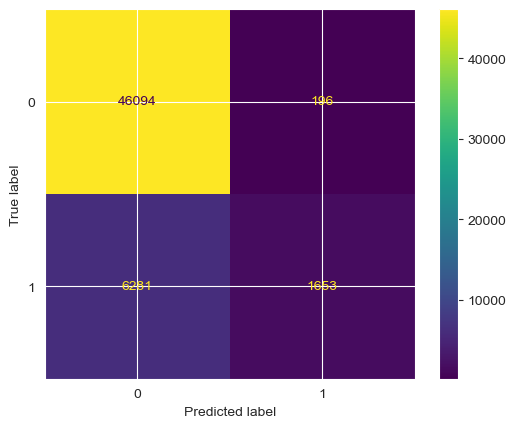

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gvc, test_x, test_y)
plt.show()

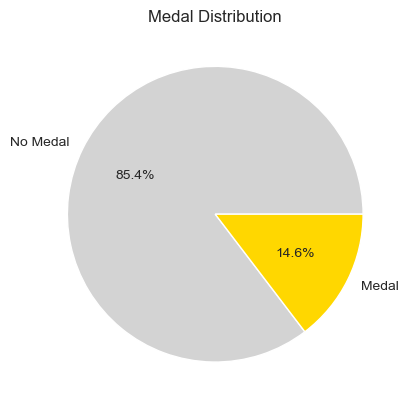

In [65]:
#we can see that out of the total 54224 athletes in the test dataset, 
#46094 athletes did not win a medal (label 0) while 1653 athletes did win a medal (label 1). 
#Therefore, we can say that a total of 1653 athletes won a medal.


import matplotlib.pyplot as plt

medal_counts = [46290, 7934]
labels = ['No Medal', 'Medal']
colors = ['lightgray', 'gold']

plt.pie(medal_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Medal Distribution')
plt.show()

In [66]:
# define the feature columns and the target column
feature_cols = ['Age', 'Height', 'Weight', 'Season', 'Sex']
target_col = 'Medal'

# split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# separate the features and target variables
train_x, train_y = train_data[feature_cols], train_data[target_col]
test_x, test_y = test_data[feature_cols], test_data[target_col]

# fit the model on the training data
Lr = LogisticRegression(random_state=1, max_iter=1000)
Lr.fit(train_x, train_y)

# make predictions on the test data
Lr_predicted = Lr.predict(test_x)

# evaluate the model using a confusion matrix and classification report
Lr_conf_matrix = confusion_matrix(test_y, Lr_predicted)
Lr_acc_score = accuracy_score(test_y, Lr_predicted)
print("Confusion matrix")
print(Lr_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:", Lr_acc_score*100, '\n')
print(classification_report(test_y, Lr_predicted))


Confusion matrix
[[46272    18]
 [ 7927     7]]


Accuracy of Gradient Boosting Classifier: 85.34781646503393 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     46290
           1       0.28      0.00      0.00      7934

    accuracy                           0.85     54224
   macro avg       0.57      0.50      0.46     54224
weighted avg       0.77      0.85      0.79     54224



In [67]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# create a LinearRegression object
lr = LinearRegression()

# fit the model using training data
lr.fit(train_x, train_y)

# predict on the test set
lr_predict = lr.predict(test_x)

# calculate the mean squared error
lr_mse = mean_squared_error(test_y, lr_predict)

# calculate the R-squared value
lr_r2 = r2_score(test_y, lr_predict)

# create a GradientBoostingClassifier object
gvc = GradientBoostingClassifier()

# fit the model using training data
gvc.fit(train_x, train_y)

# predict on the test set
gvc_predict = gvc.predict(test_x)

# calculate the mean squared error
gvc_mse = mean_squared_error(test_y, gvc_predict)

# calculate the R-squared value
gvc_r2 = r2_score(test_y, gvc_predict)

# create a RandomForestClassifier object
rf = RandomForestClassifier(n_estimators=200, random_state=10, max_depth=15)

# fit the model using training data
rf.fit(train_x, train_y)

# predict on the test set
rf_predict = rf.predict(test_x)

# calculate the mean squared error
rf_mse = mean_squared_error(test_y, rf_predict)

# calculate the R-squared value
rf_r2 = r2_score(test_y, rf_predict)

# create a LogisticRegression object
Lr = LogisticRegression(random_state=1, max_iter=1000)

# fit the model using training data
Lr.fit(train_x, train_y)

# predict on the test set
Lr_predict = Lr.predict(test_x)

# calculate the mean squared error
Lr_mse = mean_squared_error(test_y, Lr_predict)

# calculate the R-squared value
Lr_r2 = r2_score(test_y, Lr_predict)

# create DataFrame for MSE and R-squared scores
model_mse_r2 = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Logistic Regression'], 
                             'MSE': [lr_mse, rf_mse, gvc_mse, Lr_mse],
                             'R-squared': [lr_r2, rf_r2, gvc_r2, Lr_r2]})

# print the final DataFrame
print(model_mse_r2)

                 Model       MSE  R-squared
0    Linear Regression  0.122515   0.019176
1        Random Forest  0.116424   0.067931
2    Gradient Boosting  0.119449   0.043718
3  Logistic Regression  0.146522  -0.173022


In [78]:
year = 2010 # replace with the year you want to check

# filter the data to only include the year of interest
medals_in_year = data[data['Year'] == year]

# calculate the total number of medals won in the year
total_medals = medals_in_year['Medal'].count()

print(f"Total medals won in {year}: {total_medals}")


Total medals won in 2010: 4402


In [79]:
num_medals = len(data[data['Medal'].notnull()])
print("Total number of athletes who won a medal:", num_medals)

Total number of athletes who won a medal: 271116


In [81]:
from sklearn.ensemble import GradientBoostingClassifier

# define the feature columns and the target column
feature_cols = ['Age', 'Height', 'Weight', 'Season', 'Sex']
target_col = 'Medal'

# separate the features and target variables
X, y = data[feature_cols], data[target_col]

# fit the model on the data
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X, y)

# make predictions on the data
predicted = gb.predict(X)

# count the number of athletes who won a medal
num_medalists = len(predicted[predicted == 1])

print("Number of athletes who won a medal:", num_medalists)


Number of athletes who won a medal: 9359
